 # PyTorch Basics


## Objective
* PyTorch Tensor
* Feed-forward neural network implementation using PyTorch

## PyTorch Tensor 
### Tensor operation (You can get detailed information of pytorch in [https://pytorch.org](https://pytorch.org))
---
* ***Create a tensor***



In [0]:
import torch
torch.IntTensor(2,4).zero_()

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)



---


* ***Tensor size***

In [0]:
x = torch.randn(2,4)
x.size()

torch.Size([2, 4])

---
* ***Tensor type***

In [0]:
x = torch.randn(2,4)
x.type()

'torch.FloatTensor'

---
* ***Squeeze operation***
> Returns a tensor with all the dimensions of input of size 1 removed



In [0]:
x = torch.ones(3,4,1,4,1)
x.size()

torch.Size([3, 4, 1, 4, 1])

In [0]:
y = x.squeeze()
y.size()

torch.Size([3, 4, 4])

---
* ***Unsqueeze operation***
> Returns a new tensor with a dimension of size one inserted at the specified position

In [0]:
x = torch.randn(3,2)
y = x.unsqueeze(0) 
y.size()

torch.Size([1, 3, 2])

In [0]:
z = x.unsqueeze(2)
z.size()

torch.Size([3, 2, 1])

---
* ***Concatenation***
> Concatenate the given sequence of tensors in the given dimension

In [0]:
x = torch.randn(3,2)
y = torch.randn(5,2)
z = torch.cat([x,y], dim=0)
z.size()

torch.Size([8, 2])

---
* ***torch.stack***(seq, dim=0, out=None) → Tensor
> Concatenate sequence of tensors along a new dimension 
>* All tensors need to be of the same size









In [0]:
x = torch.randn(4,2)
y = torch.randn(4,2)
z = torch.randn(4,2)
w = torch.stack([x,y,z], dim=0)
w.size()

torch.Size([3, 4, 2])

In [0]:
w = torch.stack([x,y,z], dim=1)
w.size()

torch.Size([4, 3, 2])

---
* ***torch.chunk***(tensor, chunks, dim=0) → List of Tensors
>* Splits a tensor into a specific number of chunks.
>* Last chunk will be smaller if the tensor size along the given dimension dim is not divisible by chunks.

In [0]:
x = torch.randn(8,3)
y = torch.chunk(x, 4, dim=0)
print(len(y), y[0].size())

(4, torch.Size([2, 3]))


 ## PyTorch 최소 구성 요소
* 1) Data
* 2) Model
* 3) Loss function
* 4) Optimizer


<img src="https://raw.githubusercontent.com/YongHoYoo/AnomalyDetection/master/minimum_element.png" width="500">

## Implementation of neural network: XOR problem
### Define four elements (Data, Model, Loss, Optimizer)
---
* ***1) Data***

In [0]:
num_data = 100 # the number of data to be generated
ideal_x = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float)
ideal_y = torch.tensor([0,1,1,0], dtype=torch.float) 

train_x = []
train_y = [] 

for i in range(num_data): 
    x = ideal_x[i%4]+0.1*torch.randn(2) 
    y = ideal_y[i%4] 
    
    train_x.append(x)
    train_y.append(y) 
    
train_x = torch.stack(train_x, 0)
train_y = torch.stack(train_y, 0)

---
* ***2) Model***
> Input layer (2 neurons) -> Hidden layer (3 neurons + sigmoid) -> Output layer (1 neurons + sigmoid)

In [0]:
# define MyModel class
class MyModel(torch.nn.Module): 
    def __init__(self): 
      super(MyModel, self).__init__() 
      
      self.layer1 = torch.nn.Linear(2, 3) 
      self.layer2 = torch.nn.Linear(3, 1) 
      self.sigmoid = torch.nn.Sigmoid() 
      
    def forward(self, inputs):
      
      output = self.layer1(inputs) 
      output = self.sigmoid(output) 
      output = self.layer2(output) 
      output = self.sigmoid(output) 
      
      return output
      

In [0]:
# Generate MyModel instance
model = MyModel()

---
* ***3) Loss***

In [0]:
loss = torch.nn.MSELoss()

---
* ***4) Optimizer***

In [0]:
optimizer = torch.optim.SGD(model.parameters(), lr=1.0)

### Train the defined model

* Model consists of weight $W$ & weight gradient $\Delta W$. 
>* STEP 1: Initialize $\Delta W$. 
>* STEP 2: Get output, $Y = Model(X)$. 
>* STEP 3: Get error, $Error = (X-\hat{X})^2$. 
>* STEP 4: Derive $\Delta W$ by back-propagation. 
>* STEP 5: Update weight: $W^{new} = W - \Delta W$. 

In [0]:
# Set maximum epoch, batch_size 
num_epochs = 100
batch_size = 25

for epoch in range(num_epochs):

  for i in range(0, 100, batch_size): 
    inputs = train_x[i:i+batch_size]
    targets = train_y[i:i+batch_size] 

    # Weight update 
    optimizer.zero_grad() # STEP 1
    outputs = model(inputs) # STEP 2
    error = loss(outputs.squeeze(), targets) # STEP 3
    error.backward() # STEP 4
    optimizer.step() # STEP 5

### Plot results

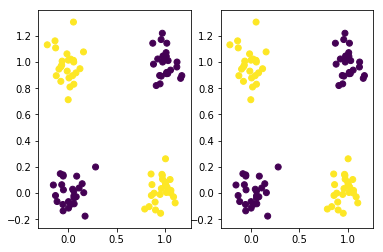

In [0]:
import matplotlib.pyplot as plt

# get outputs
output_y = model(train_x).squeeze()
output_y
output_y = (output_y>0.5).float()

# plot 
fig = plt.figure() 
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2) 

ax1.scatter(train_x[:, 0], train_x[:, 1], c=train_y)
ax2.scatter(train_x[:, 0], train_x[:, 1], c=output_y)

## Dataloader

* Using whole data at once may cause **"Out of memory"**
* We splitted the whole data into batch whose size is **25**
>* If the number of data doesn't divide by the batch size? 
>* If we need to shuffle the order of data in training phase? 
>### To handle above conditions, PyTorch provides **"Dataloader"**
<img src="https://raw.githubusercontent.com/YongHoYoo/AnomalyDetection/master/shuffle.png" width="500">

### Define Custom DataLoader

* 1) **\_\_init\_\_(self)**: download, read data, etc. 
* 2) **\_\_getitem\_\_(self, index)**: return one item on the index 
* 3) **\_\_len\_\_(self)**: return the data length 


In [0]:
from torch.utils.data import Dataset, DataLoader

# define custom dataloader
class MyDataset(Dataset):
  def __init__(self, x, y): # x: inputs, y: outputs
    self.x = x
    self.y = y
    
  def __getitem__(self, index): 
    return self.x[index], self.y[index] 
  
  def __len__(self):
    return len(self.x)

### Load Custom DataLoader and apply **it**

In [0]:
dataset = MyDataset(train_x, train_y)
train_loader = DataLoader(dataset=dataset, batch_size=25, shuffle=True)

In [0]:
# Set maximum epoch, batch_size 
num_epochs = 100

for epoch in range(num_epochs):

  for inputs, targets in train_loader: 

    # Weight update 
    optimizer.zero_grad() # STEP 1
    outputs = model(inputs) # STEP 2
    error = loss(outputs.squeeze(), targets) # STEP 3
    error.backward() # STEP 4
    optimizer.step() # STEP 5